In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings("ignore")


In [3]:
data = pd.read_csv("DATA FOR PYTHON/E-commerce Customer Behavior - Sheet1.csv")
data

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:
data.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [6]:
#DATA CLEANING

In [7]:
missing_values =data.isnull().sum()
na_values=data.isna().sum()
duplicates = data.duplicated().sum()
unique_values = data.nunique()

#Creating a dataframe of the data cleaning process
columns = pd.DataFrame({
    "missing_values" : missing_values,
    "na_values" : na_values,
    "duplicates":duplicates,
    "unique_values" : unique_values})
columns

,missing_values,na_values,duplicates,unique_values
Customer ID,0,0,0,350
Gender,0,0,0,2
Age,0,0,0,16
City,0,0,0,6
Membership Type,0,0,0,3
Total Spend,0,0,0,76
Items Purchased,0,0,0,15
Average Rating,0,0,0,20
Discount Applied,0,0,0,2
Days Since Last Purchase,0,0,0,54


In [8]:
data = data.drop_duplicates()

In [9]:
data['Satisfaction Level'] = data['Satisfaction Level'].fillna("Unknown")


In [10]:
#Cleaned dataset
missing_values =data.isnull().sum()
na_values=data.isna().sum()
duplicates = data.duplicated().sum()
unique_values = data.nunique()

#Creating a dataframe of the data cleaning process
columns = pd.DataFrame({
    "missing_values" : missing_values,
    "na_values" : na_values,
    "duplicates":duplicates,
    "unique_values" : unique_values})
columns

,missing_values,na_values,duplicates,unique_values
Customer ID,0,0,0,350
Gender,0,0,0,2
Age,0,0,0,16
City,0,0,0,6
Membership Type,0,0,0,3
Total Spend,0,0,0,76
Items Purchased,0,0,0,15
Average Rating,0,0,0,20
Discount Applied,0,0,0,2
Days Since Last Purchase,0,0,0,54


In [11]:
# Define which columns are numerical and which are categorical
categorical_features = ['Gender', 'City', 'Membership Type', 'Satisfaction Level', 'Discount Applied']
numeric_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(), categorical_features)  # Apply OneHotEncoder to categorical columns
    ])

In [12]:
# Apply transformations
data_transformed = preprocessor.fit_transform(data)

In [13]:
# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_transformed)
    wcss.append(kmeans.inertia_)

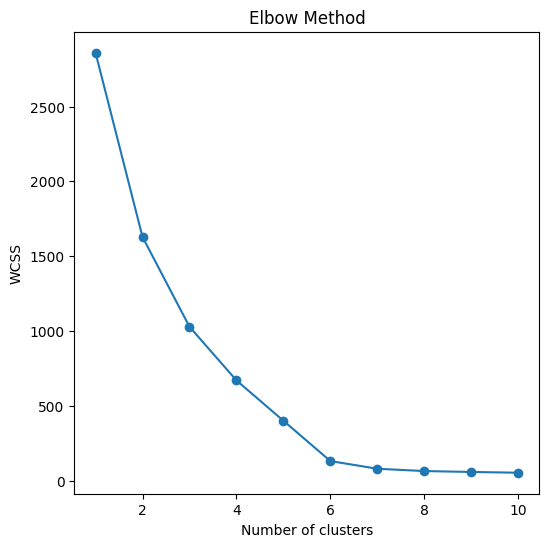

In [14]:
# Plot the elbow method
plt.figure(figsize=(6, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
# From the elbow plot, choose the optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_transformed)

In [16]:
# Add cluster labels to the original data
data['Cluster'] = clusters

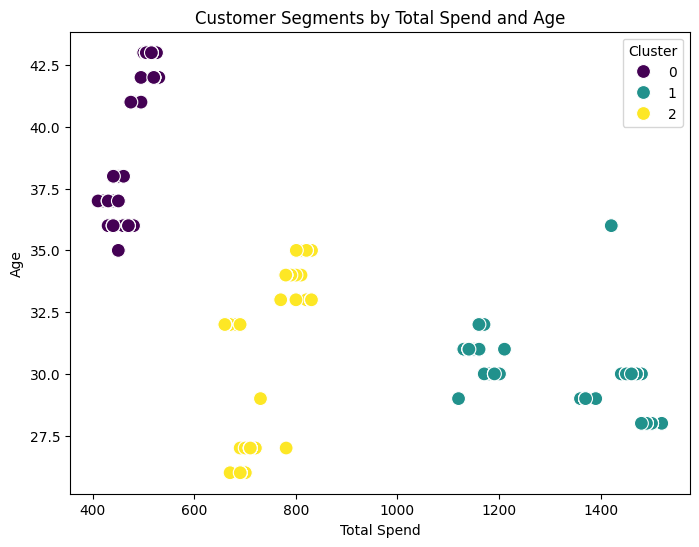

In [17]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Total Spend', y='Age', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segments by Total Spend and Age')
plt.xlabel('Total Spend')
plt.ylabel('Age')
plt.legend(title='Cluster')
plt.show()

Inference:
Segmentation based on Age and spending habits.
Younger customers (Cluster 1) tend to spend moderately.
Middle-aged customers (Cluster 0) spend less overall.
Customers who are middle-aged to older (Cluster 2) tend to have the highest spending.

In [18]:
#Exploratory data analysis

Which Gender purchases the most?

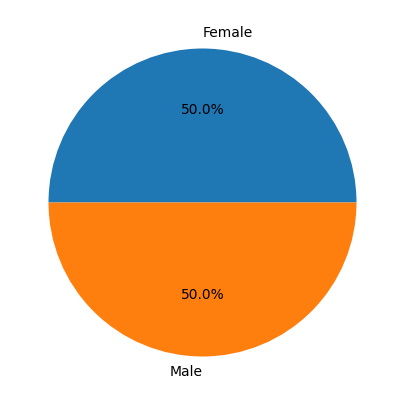

In [19]:
highest_purchaser = list(data['Gender'].value_counts())
highest_purchaser

plt.figure(figsize= (5,5))
plt.pie(highest_purchaser, labels = ['Female', 'Male'],autopct='%0.1f%%')
plt.show()

Inference:
In the above data, there are equal buyers based on gender

In [20]:
#Who spends the highest based on gender?

In [21]:
gender = data['Gender'].value_counts().keys()
gender

Index(['Female', 'Male'], dtype='object', name='Gender')

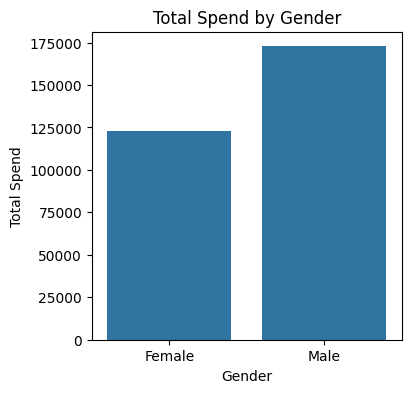

In [22]:
plt.figure(figsize=(4,4))
sns.barplot(data=data, x='Gender', y='Total Spend', estimator=sum, ci=None)
plt.title('Total Spend by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spend')
plt.show()

Inference:
The data is about E - Commerce Customer Behavior.
Based on the findings, Male spent the most in E - Commerce.
This could imply that male customers have a higher purchasing power or different spending behavior compared to female customers.

In [23]:
high_purchases= data[['City','Items Purchased']]
high_purchases

,City,Items Purchased
0,New York,14
1,Los Angeles,11
2,Chicago,9
3,San Francisco,19
4,Miami,13
...,...,...
345,Miami,10
346,Houston,8
347,New York,16
348,Los Angeles,11


Which city has highest number of item purchases?

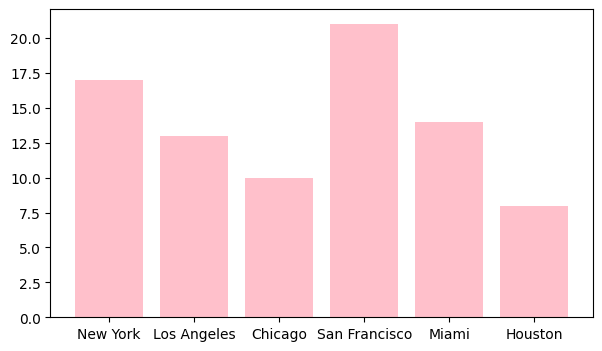

In [24]:
plt.figure(figsize=(7,4))
plt.bar(list(high_purchases['City']),list(high_purchases['Items Purchased']),color=("pink"))
plt.show()

Inference:
San Francisco has the highest number of item purchases among the cities analyzed.
New York is also a significant market with a high number of item purchases, close to that of San Francisco.
Chicago and Houston have relatively lower purchases, indicating potentially lower consumer activity or market penetration in these cities compared to others.

In [25]:
# Segment customers by gender and city
age_gender_city_segmentation = data.groupby(['Gender', 'City']).agg({
    'Age': ['mean', 'min', 'max', 'count'],
    'Total Spend': ['mean', 'sum'],
    'Items Purchased': ['mean', 'sum']
}).reset_index()
print(age_gender_city_segmentation)


   Gender           City        Age                Total Spend           \
                               mean min max count         mean      sum   
0  Female        Chicago  42.017241  41  43    58   499.882759  28993.2   
1  Female        Houston  36.706897  35  38    58   446.894828  25919.9   
2  Female          Miami  29.000000  29  29     1   730.400000    730.4   
3  Female       New York  30.706897  29  32    58  1164.250000  67526.5   
4    Male    Los Angeles  34.118644  27  35    59   805.491525  47524.0   
5    Male          Miami  28.947368  26  32    57   689.687719  39312.2   
6    Male       New York  31.000000  31  31     1  1210.600000   1210.6   
7    Male  San Francisco  29.120690  28  36    58  1459.772414  84666.8   

  Items Purchased        
             mean   sum  
0        9.413793   546  
1        7.568966   439  
2       14.000000    14  
3       15.241379   884  
4       11.677966   689  
5       11.596491   661  
6       17.000000    17  
7       20.0000

Inference:
This provides the summary of data based on Gender and city segmentation

In [26]:
# Segment customers by city
age_gender_city_segmentation = data.groupby('City').agg({
    'Gender':['count'],
    'Age': ['mean', 'min', 'max', 'count'],
    'Total Spend': ['mean', 'sum'],
    'Items Purchased': ['mean', 'sum']
}).reset_index()
print(age_gender_city_segmentation)


            City Gender        Age                Total Spend           \
                  count       mean min max count         mean      sum   
0        Chicago     58  42.017241  41  43    58   499.882759  28993.2   
1        Houston     58  36.706897  35  38    58   446.894828  25919.9   
2    Los Angeles     59  34.118644  27  35    59   805.491525  47524.0   
3          Miami     58  28.948276  26  32    58   690.389655  40042.6   
4       New York     59  30.711864  29  32    59  1165.035593  68737.1   
5  San Francisco     58  29.120690  28  36    58  1459.772414  84666.8   

  Items Purchased        
             mean   sum  
0        9.413793   546  
1        7.568966   439  
2       11.677966   689  
3       11.637931   675  
4       15.271186   901  
5       20.000000  1160  


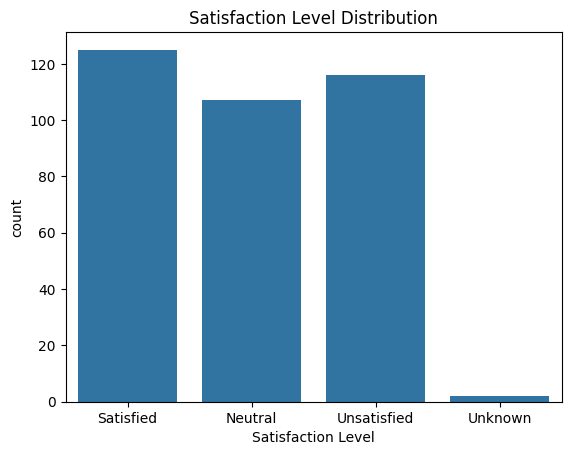

In [27]:
# Satisfaction level count plot
sns.countplot(data=data, x='Satisfaction Level')
plt.title('Satisfaction Level Distribution')
plt.show()

Inference:
This provides the count on Consumer Satisfaction towards buying behavior.
There are more Satisfied and Unsatisfied levels. It is very important to analyze the reason for the dissatisfaction.

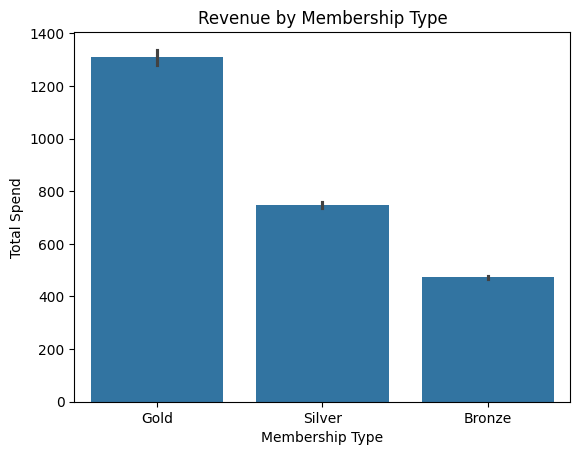

In [28]:
# Revenue by membership type
sns.barplot(data=data, x='Membership Type', y='Total Spend')
plt.title('Revenue by Membership Type')
plt.show()

Inference:
Consumer with Gold Membership Type spends the most

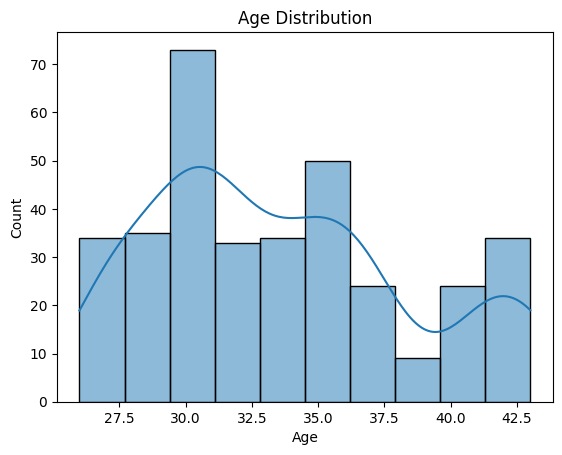

In [29]:
# Age distribution
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()


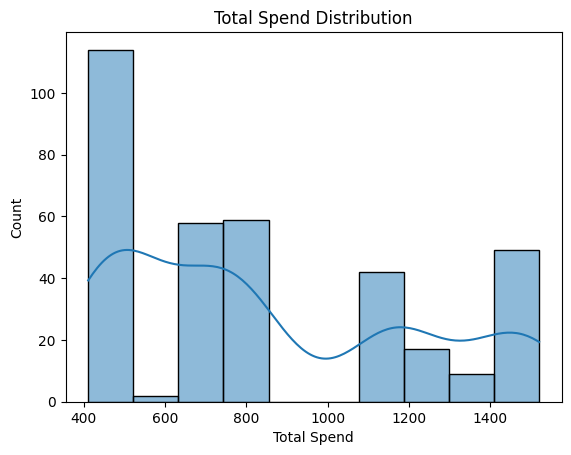

In [30]:
# Total spend distribution
sns.histplot(data['Total Spend'], bins=10, kde=True)
plt.title('Total Spend Distribution')
plt.show()

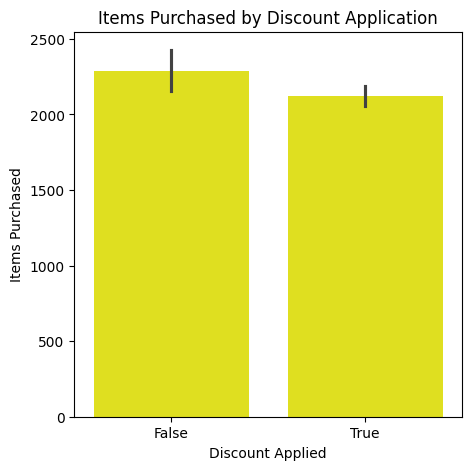

In [31]:
# Plot items purchased by discount application
plt.figure(figsize=(5,5))
sns.barplot(data=data, x='Discount Applied', y='Items Purchased', estimator=sum, color = ('yellow'))
plt.title('Items Purchased by Discount Application')
plt.xlabel('Discount Applied')
plt.ylabel('Items Purchased')
plt.show()


Inference:
Customers who did not receive a discount tend to purchase a slightly higher number of items compared to those who received a discount.
This finding is consistent with the inference showing that customers without discounts tend to have higher total spend.
The slight difference in the number of items purchased suggests that discounts may not significantly influence the quantity of items bought, but rather the overall spending behavior.

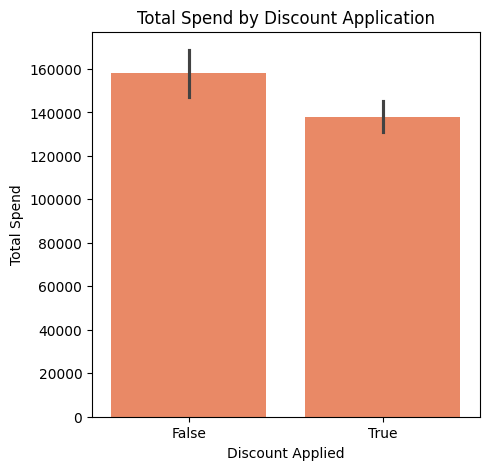

In [32]:
# Plot total spend by discount application
plt.figure(figsize=(5, 5))
sns.barplot(data=data, x='Discount Applied', y='Total Spend', estimator=sum, color = ('coral'))
plt.title('Total Spend by Discount Application')
plt.xlabel('Discount Applied')
plt.ylabel('Total Spend')
plt.show()


Inference:
Customers who did not receive a discount tend to have a higher total spend compared to those who received a discount.
This could imply that discounts may attract price-sensitive customers who spend less overall, or that discounts might not be as effective in driving higher total sales as intended.
Customers who are willing to pay full price are those who are likely to spend more in general.

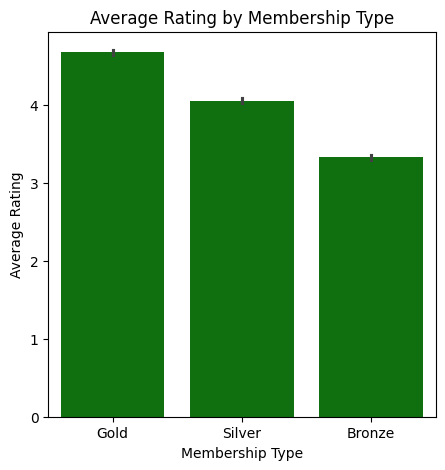

In [33]:
# Plot average rating by membership type
plt.figure(figsize=(5,5))
sns.barplot(data=data, x='Membership Type', y='Average Rating',color=('green'))
plt.title('Average Rating by Membership Type')
plt.xlabel('Membership Type')
plt.ylabel('Average Rating')
plt.show()


Inference:
Customer with Gold Membership gives the highest rating, indicating they are the most satisfied.
Customers with Silver and Bronze Memberships are less satisfied compared to Gold members, with Bronze members being the least satisfied.
